PyCaret is a user-friendly, open-source library in Python that simplifies the comprehensive process of machine learning. It's designed to accelerate and facilitate tasks from data preparation to model deployment for both novices and experts in data science. PyCaret includes numerous features for streamlining model training, selection, and deployment.

To install a particular version of PyCaret along with specific versions of pandas and numpy, you can use the following command:


!pip install pandas==2.0.3 numpy>=1.25.0 pycaret

If you encounter any errors during the installation, it's advisable to reattempt the installation command.

In [ ]:
!pip install pandas==2.0.3 numpy>=1.25.0 pycaret

In [ ]:
from pycaret.utils import version
version()

'3.3.2'

## **PRINCIPAL COMPONENT ANALYSIS**

PCA stands for Principal Component Analysis, and it is a widely used technique in data analysis and machine learning for reducing the dimensionality of large datasets. The basic idea behind PCA is to transform a set of high-dimensional variables into a smaller set of uncorrelated variables called principal components, while retaining as much of the original variance as possible.


**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  2.0.3
Seaborn version:  0.13.1


# **Dataset**

The “Occupancy Detection Data Set UCI” used for Principle Component Analysis (PCA) and classification models is obtained from Kaggle. It is a dataset for predicting room occupancy using environmental factors.

There are 6 attributes with 2665 entries and one column for classification. 0 represents No occupancy and 1 represents There is occupancy.

All attributes are numerical and they are listed bellow: Date, Temperature, Humidity, Light, CO2, HumidityRatio, Occupancy

The original dataset can be found on below link: https://www.kaggle.com/datasets/robmarkcole/occupancy-detection-data-set-uci

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datatest.txt to datatest.txt


In [ ]:
import io
ds= pd.read_csv(io.BytesIO(uploaded['datatest.txt']))
df= ds.drop(columns=['date'], axis =1)
df.head(25)

Temperature  Humidity       Light         CO2  HumidityRatio  Occupancy
140      23.7000   26.2720  585.200000  749.200000       0.004764          1
141      23.7180   26.2900  578.400000  760.400000       0.004773          1
142      23.7300   26.2300  572.666667  769.666667       0.004765          1
143      23.7225   26.1250  493.750000  774.750000       0.004744          1
144      23.7540   26.2000  488.600000  779.000000       0.004767          1
145      23.7600   26.2600  568.666667  790.000000       0.004779          1
146      23.7300   26.2900  536.333333  798.000000       0.004776          1
147      23.7540   26.2900  509.000000  797.000000       0.004783          1
148      23.7540   26.3500  476.000000  803.200000       0.004794          1
149      23.7360   26.3900  510.000000  809.000000       0.004796          1
150      23.7450   26.4450  481.500000  815.250000       0.004809          1
151      23.7000   26.5600  481.800000  824.000000       0.004817          1
152      23.7000   26.6000  475.250000  832.000000       0.004824          1
153      23.7000   26.7000  469.000000  845.333333       0.004842          1
154      23.7000   26.7740  464.000000  852.400000       0.004856          1
155      23.7000   26.8900  464.000000  861.000000       0.004877          1
156      23.7000   26.9725  455.000000  880.000000       0.004892          1
157      23.6000   26.8900  454.000000  891.000000       0.004848          1
158      23.6400   26.9760  458.000000  897.600000       0.004875          1
159      23.6500   27.0500  464.000000  900.500000       0.004891          1
160      23.6400   27.1000  473.000000  908.800000       0.004898          1
161      23.6000   27.1600  464.000000  918.000000       0.004897          1
162      23.6000   27.2360  498.400000  925.200000       0.004910          1
163      23.6000   27.2900  530.200000  929.400000       0.004920          1
164      23.6000   27.3300  533.600000  936.400000       0.004928          1

In [ ]:
df.tail(25)

Temperature   Humidity       Light          CO2  HumidityRatio  \
2780    23.984286  26.375714  767.000000  1172.714286       0.004866   
2781    24.000000  26.365000  774.500000  1182.000000       0.004869   
2782    24.050000  26.340000  774.500000  1182.000000       0.004879   
2783    24.080000  26.370000  769.800000  1187.600000       0.004893   
2784    24.100000  26.566667  758.333333  1191.333333       0.004936   
2785    24.100000  26.472500  775.750000  1213.750000       0.004919   
2786    24.100000  26.154000  775.000000  1194.000000       0.004859   
2787    24.100000  25.958000  783.400000  1173.400000       0.004822   
2788    24.100000  25.918000  789.600000  1160.200000       0.004815   
2789    24.100000  25.892500  797.500000  1156.250000       0.004810   
2790    24.100000  25.832000  799.000000  1139.000000       0.004799   
2791    24.175000  25.840000  782.500000  1140.500000       0.004822   
2792    24.200000  25.891667  786.166667  1145.333333       0.004839   
2793    24.200000  25.890000  794.250000  1149.250000       0.004839   
2794    24.200000  25.890000  797.500000  1152.500000       0.004839   
2795    24.200000  25.890000  787.000000  1153.250000       0.004839   
2796    24.218000  25.912000  805.000000  1152.400000       0.004848   
2797    24.260000  25.891667  798.000000  1146.166667       0.004857   
2798    24.290000  25.978000  793.000000  1145.400000       0.004882   
2799    24.290000  25.852000  801.400000  1140.800000       0.004858   
2800    24.290000  25.700000  808.000000  1150.250000       0.004829   
2801    24.330000  25.736000  809.800000  1129.200000       0.004848   
2802    24.330000  25.700000  817.000000  1125.800000       0.004841   
2803    24.356667  25.700000  813.000000  1123.000000       0.004849   
2804    24.408333  25.681667  798.000000  1124.000000       0.004860   

      Occupancy  
2780          1  
2781          1  
2782          1  
2783          1  
2784          1  
2785          1  
2786          1  
2787          1  
2788          1  
2789          1  
2790          1  
2791          1  
2792          1  
2793          1  
2794          1  
2795          1  
2796          1  
2797          1  
2798          1  
2799          1  
2800          1  
2801          1  
2802          1  
2803          1  
2804          1

In [ ]:
df.shape

(2665, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2665 entries, 140 to 2804
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    2665 non-null   float64
 1   Humidity       2665 non-null   float64
 2   Light          2665 non-null   float64
 3   CO2            2665 non-null   float64
 4   HumidityRatio  2665 non-null   float64
 5   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 145.7 KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  82


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


# **Exploratory Data Analysis**

sns.pairplot is a function in the seaborn library in Python that is used to plot pairwise relationships between multiple variables in a dataset. The resulting plot is a grid of scatterplots, with each variable plotted against every other variable.

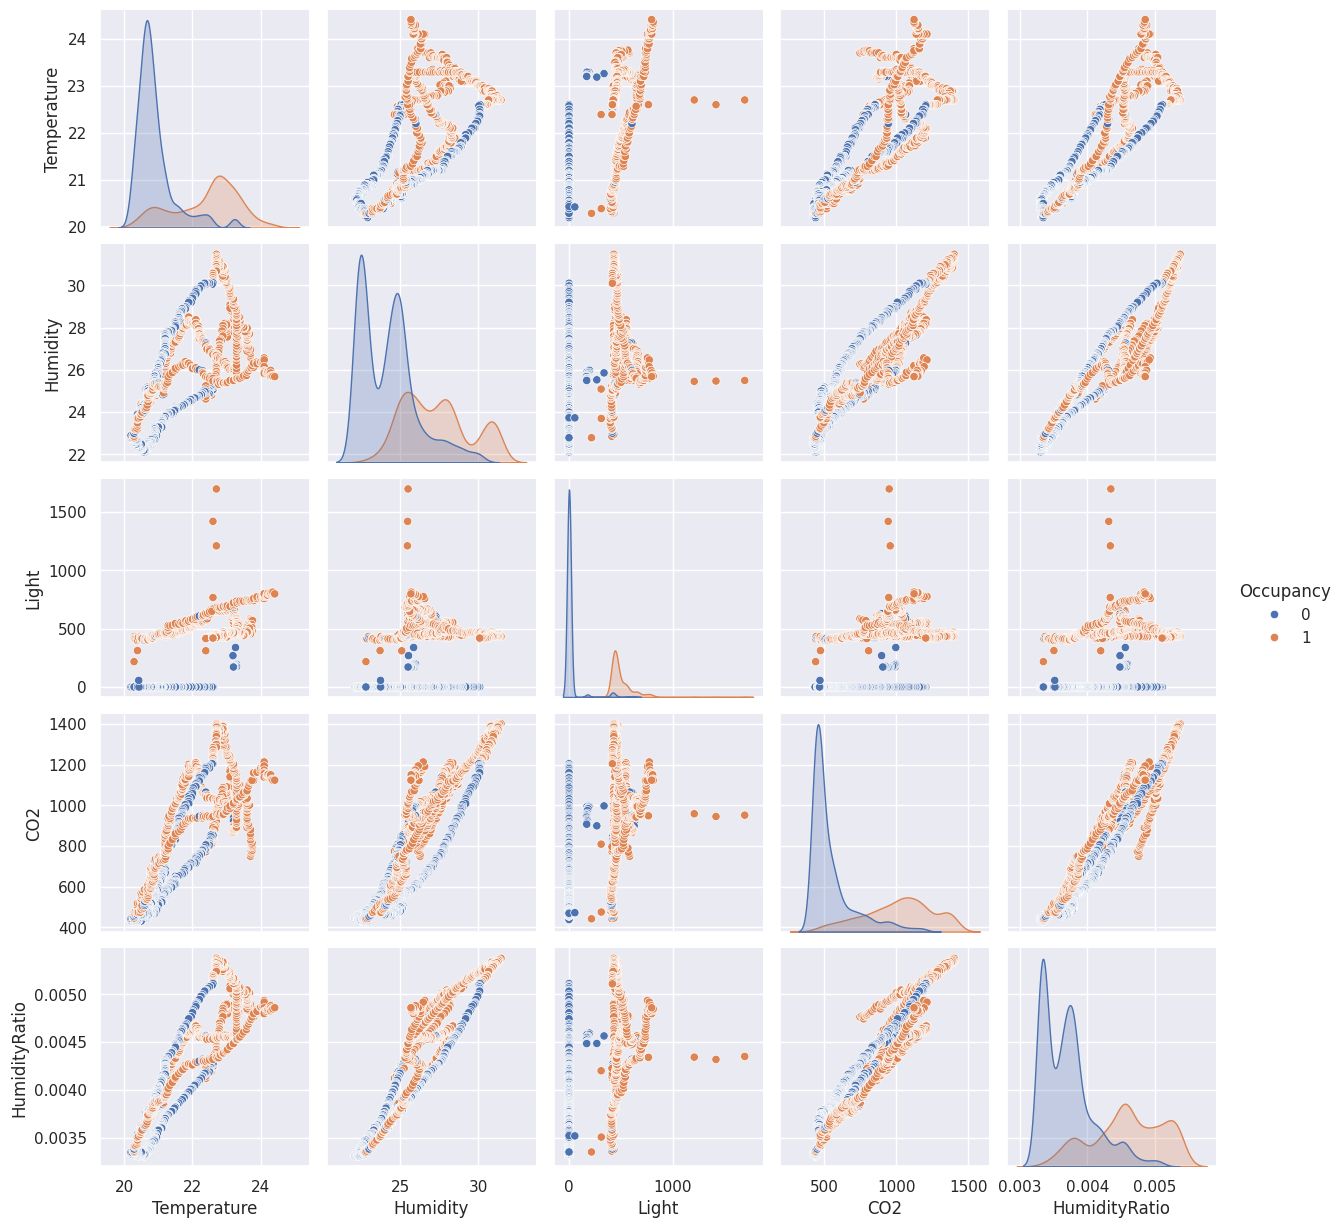

In [ ]:
sns.pairplot(df, hue='Occupancy')
plt.show()

# **Data Matrix**

In [ ]:
X = df.drop(columns=['Occupancy'])
X.head(10)

Temperature  Humidity       Light         CO2  HumidityRatio
140      23.7000    26.272  585.200000  749.200000       0.004764
141      23.7180    26.290  578.400000  760.400000       0.004773
142      23.7300    26.230  572.666667  769.666667       0.004765
143      23.7225    26.125  493.750000  774.750000       0.004744
144      23.7540    26.200  488.600000  779.000000       0.004767
145      23.7600    26.260  568.666667  790.000000       0.004779
146      23.7300    26.290  536.333333  798.000000       0.004776
147      23.7540    26.290  509.000000  797.000000       0.004783
148      23.7540    26.350  476.000000  803.200000       0.004794
149      23.7360    26.390  510.000000  809.000000       0.004796

In [ ]:
X.describe().transpose()

count        mean         std         min         25%  \
Temperature    2665.0   21.433876    1.028024   20.200000   20.650000   
Humidity       2665.0   25.353937    2.436842   22.100000   23.260000   
Light          2665.0  193.227556  250.210906    0.000000    0.000000   
CO2            2665.0  717.906470  292.681718  427.500000  466.000000   
HumidityRatio  2665.0    0.004027    0.000611    0.003303    0.003529   

                      50%         75%          max  
Temperature     20.890000   22.356667    24.408333  
Humidity        25.000000   26.856667    31.472500  
Light            0.000000  442.500000  1697.250000  
CO2            580.500000  956.333333  1402.250000  
HumidityRatio    0.003815    0.004532     0.005378

**Standardize the Data**

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Temperature  Humidity     Light       CO2  HumidityRatio
0     2.204762  0.376814  1.566862  0.106940       1.207540
1     2.222275  0.384202  1.539680  0.145214       1.221461
2     2.233950  0.359575  1.516762  0.176881       1.209161
3     2.226653  0.316478  1.201302  0.194253       1.174140
4     2.257300  0.347262  1.180715  0.208776       1.211522
5     2.263138  0.371888  1.500772  0.246367       1.232389
6     2.233950  0.384202  1.371524  0.273705       1.227154
7     2.257300  0.384202  1.262262  0.270288       1.238551
8     2.257300  0.408828  1.130348  0.291475       1.256571
9     2.239788  0.425246  1.266259  0.311296       1.260002

In [ ]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Temperature    2665.0  1.738363e-15  1.000188 -1.200466 -0.762651 -0.529149   
Humidity       2665.0 -1.023821e-15  1.000188 -1.335559 -0.859444 -0.145271   
Light          2665.0 -3.199442e-17  1.000188 -0.772404 -0.772404 -0.772404   
CO2            2665.0 -4.265923e-17  1.000188 -0.992412 -0.860846 -0.469562   
HumidityRatio  2665.0 -4.905811e-16  1.000188 -1.185496 -0.815009 -0.347182   

                    75%       max  
Temperature    0.897803  2.893916  
Humidity       0.616787  2.511328  
Light          0.996436  6.012147  
CO2            0.814781  2.338622  
HumidityRatio  0.826469  2.212680

**Observations and variables**

In [ ]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

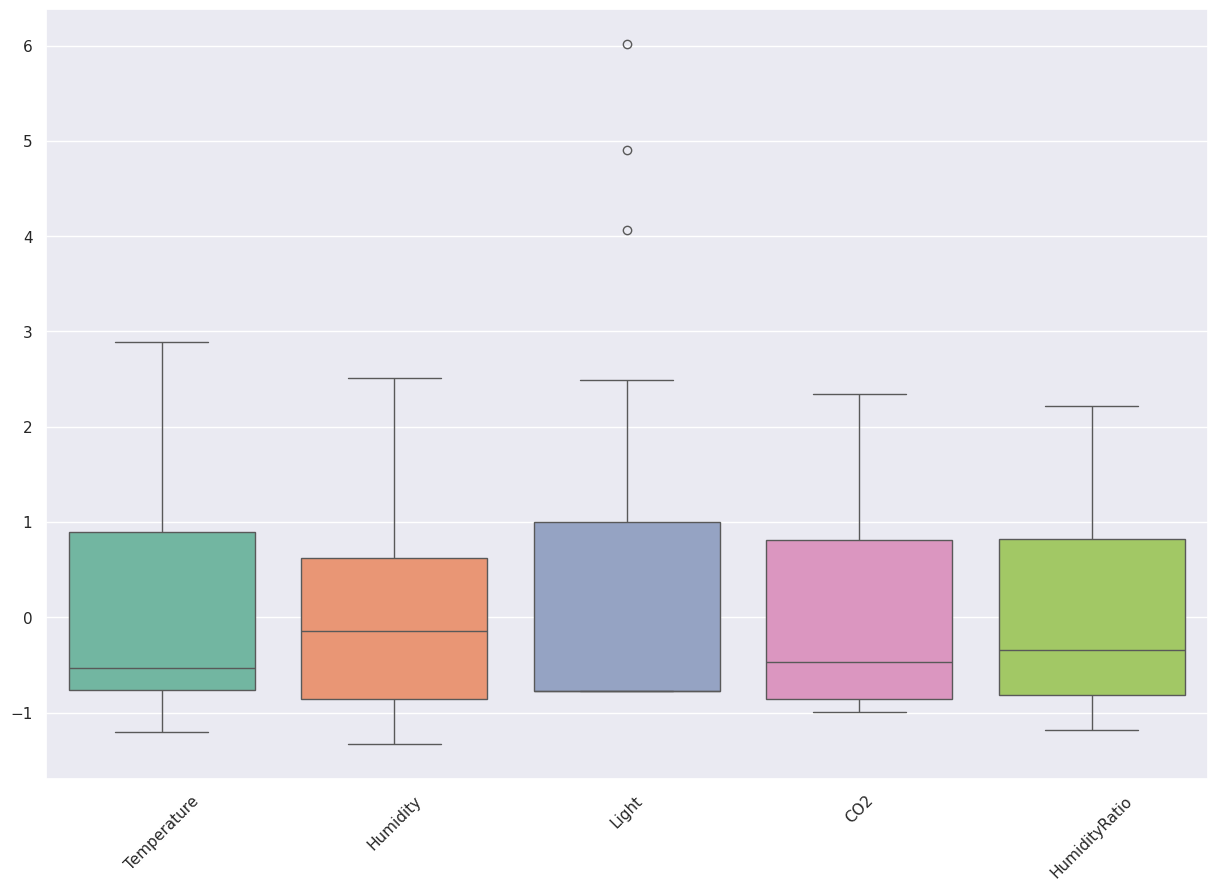

In [ ]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

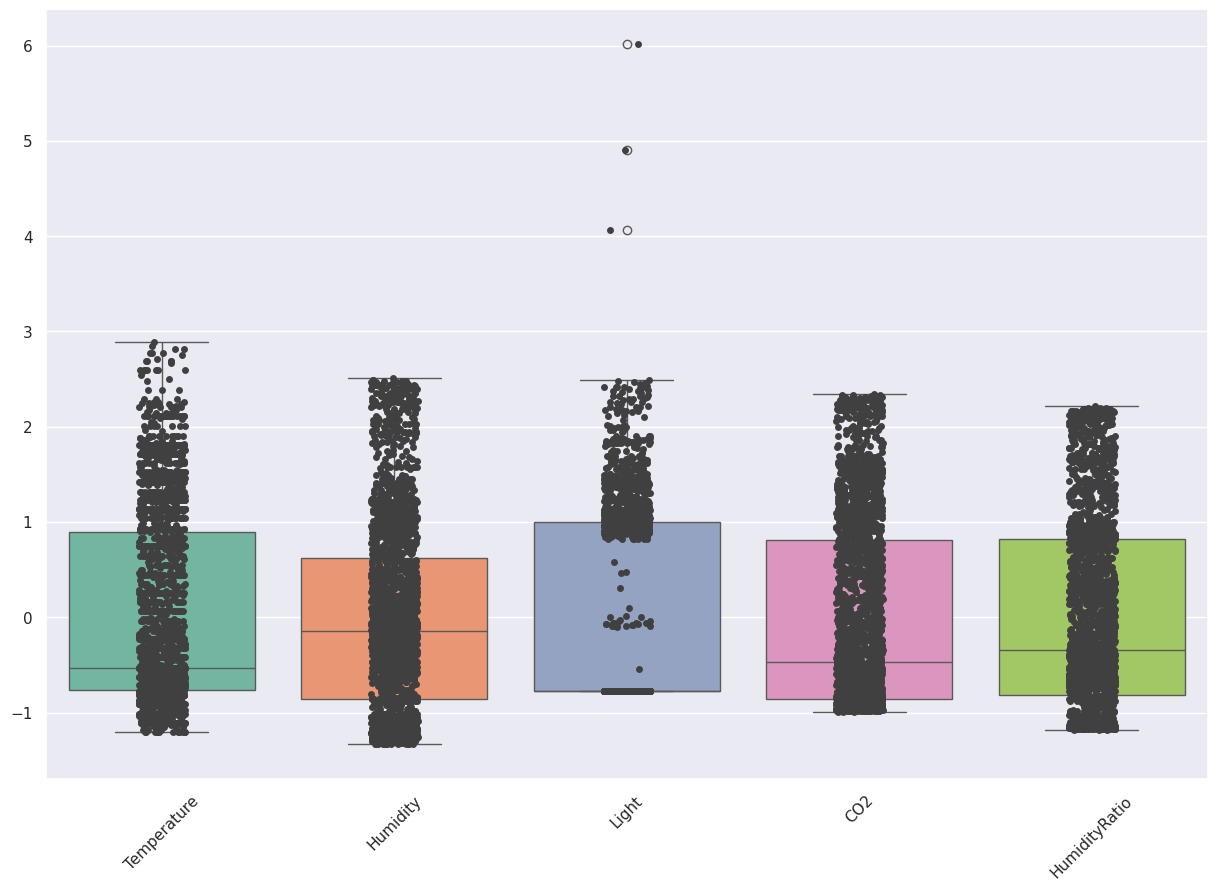

In [ ]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

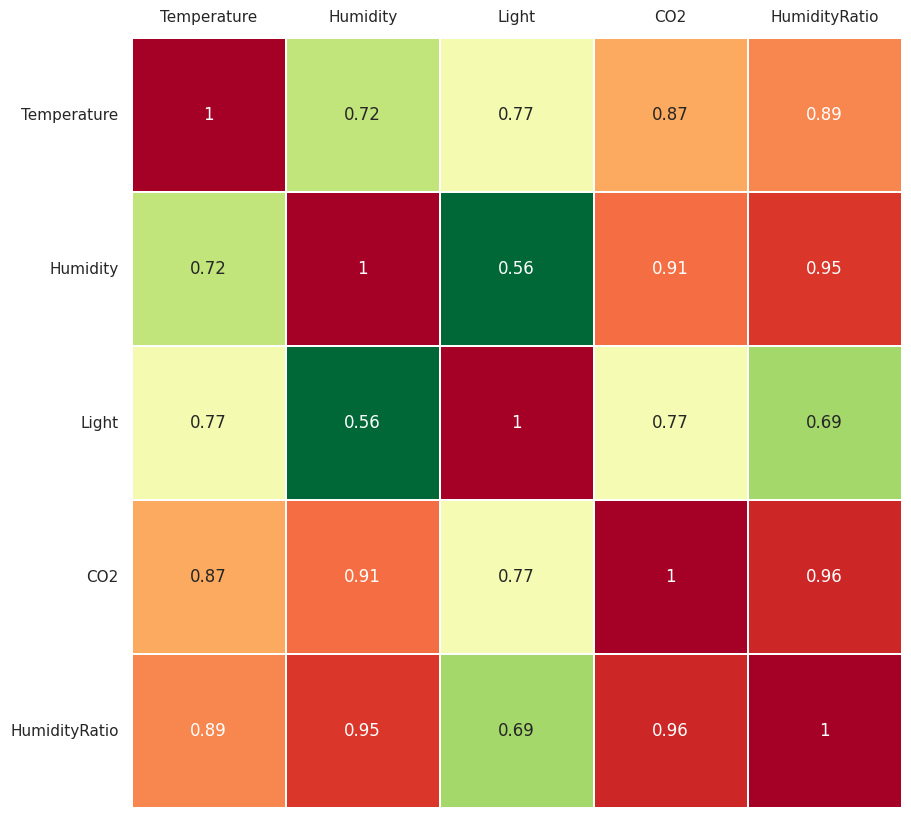

In [ ]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

# **Applying PCA**

Text(0, 0.5, 'Z2')

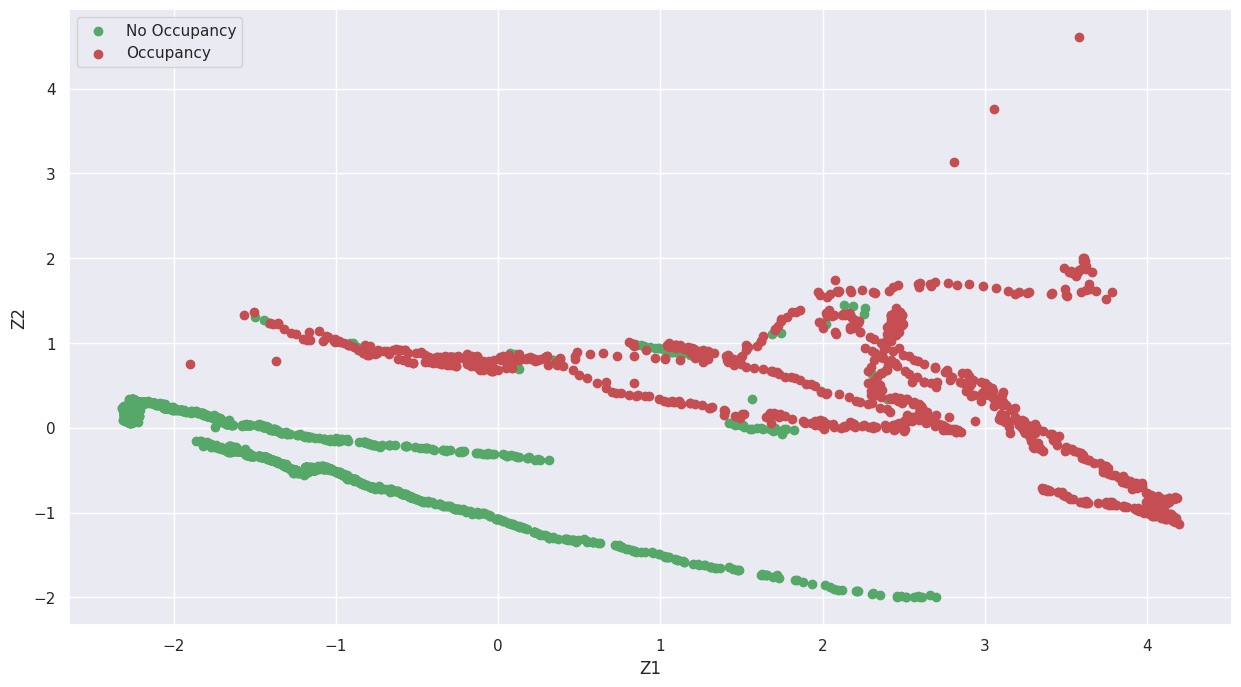

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# Occupancy->1,  No_Occupancy->0
idx_No_Occupancy = np.where(y == 0)
idx_Occupancy = np.where(y == 1)

plt. figure(figsize=(15,8))
plt.scatter(Z[idx_No_Occupancy,0], Z[idx_No_Occupancy,1], c='g', label='No Occupancy')
plt.scatter(Z[idx_Occupancy,0], Z[idx_Occupancy,1], c='r', label='Occupancy')

plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

**Eigenvectors**

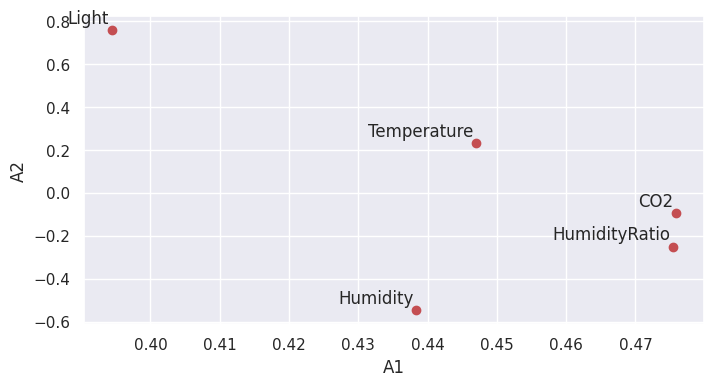

In [ ]:
A = pca.components_.T
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

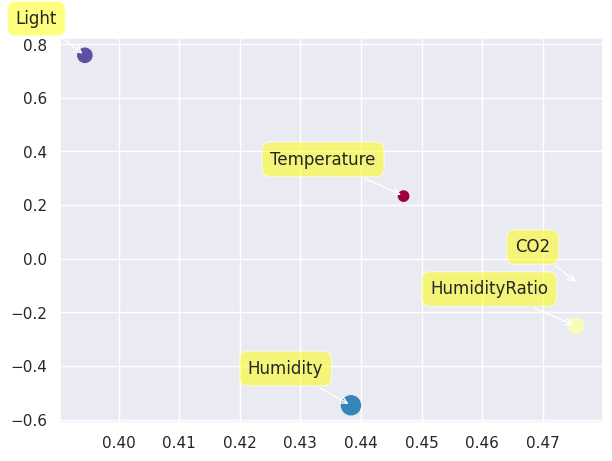

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('')
plt.ylabel('')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree Plot**

array([4.26044701e+00, 5.07325802e-01, 1.96034413e-01, 3.72872352e-02,
       7.82416132e-04])

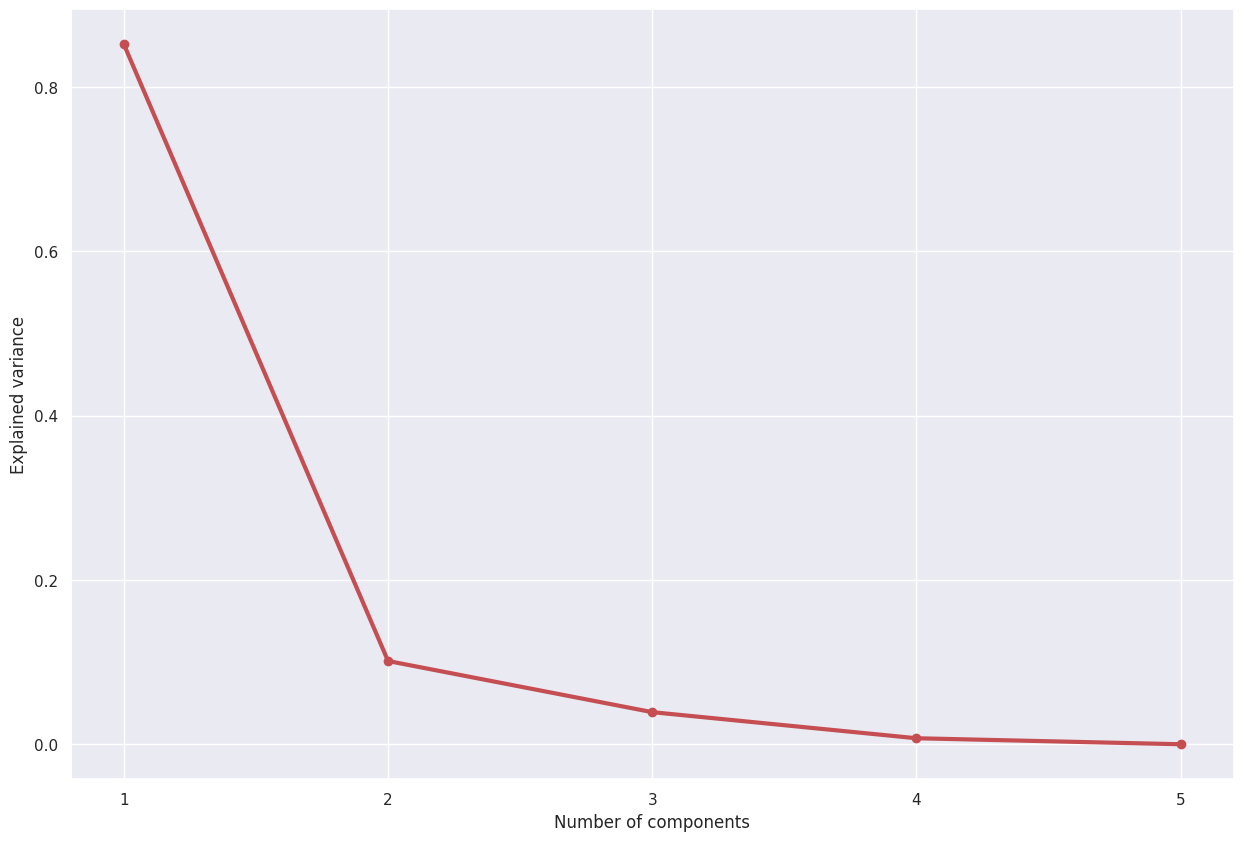

In [ ]:
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

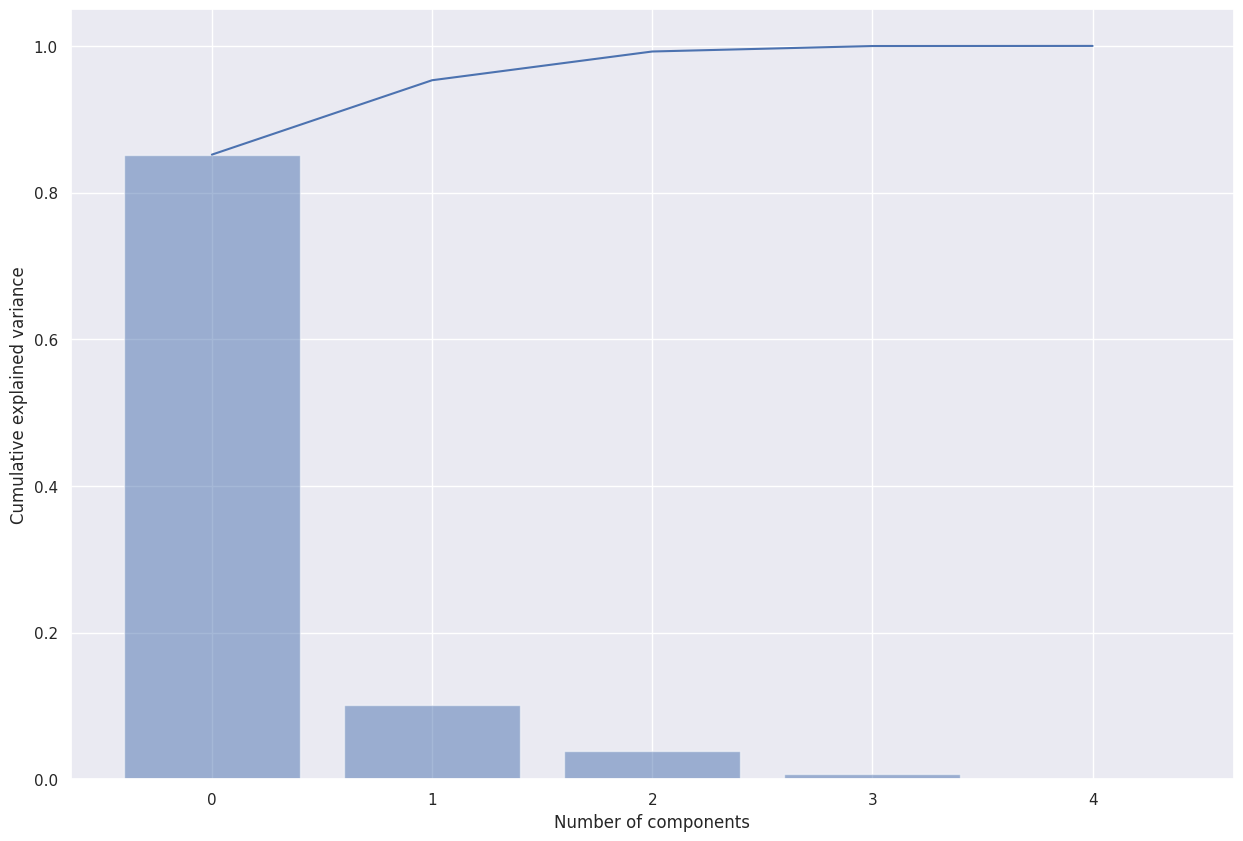

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Explained Variance Per PC**

In [ ]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (85.2%)',
 '1': 'PC 2 (10.1%)',
 '2': 'PC 3 (3.9%)',
 '3': 'PC 4 (0.7%)',
 '4': 'PC 5 (0.0%)'}

**Biplot**

array([1.18393443, 1.15629472, 1.15522022, ..., 2.0059337 , 1.9975572 ,
       1.96283107])

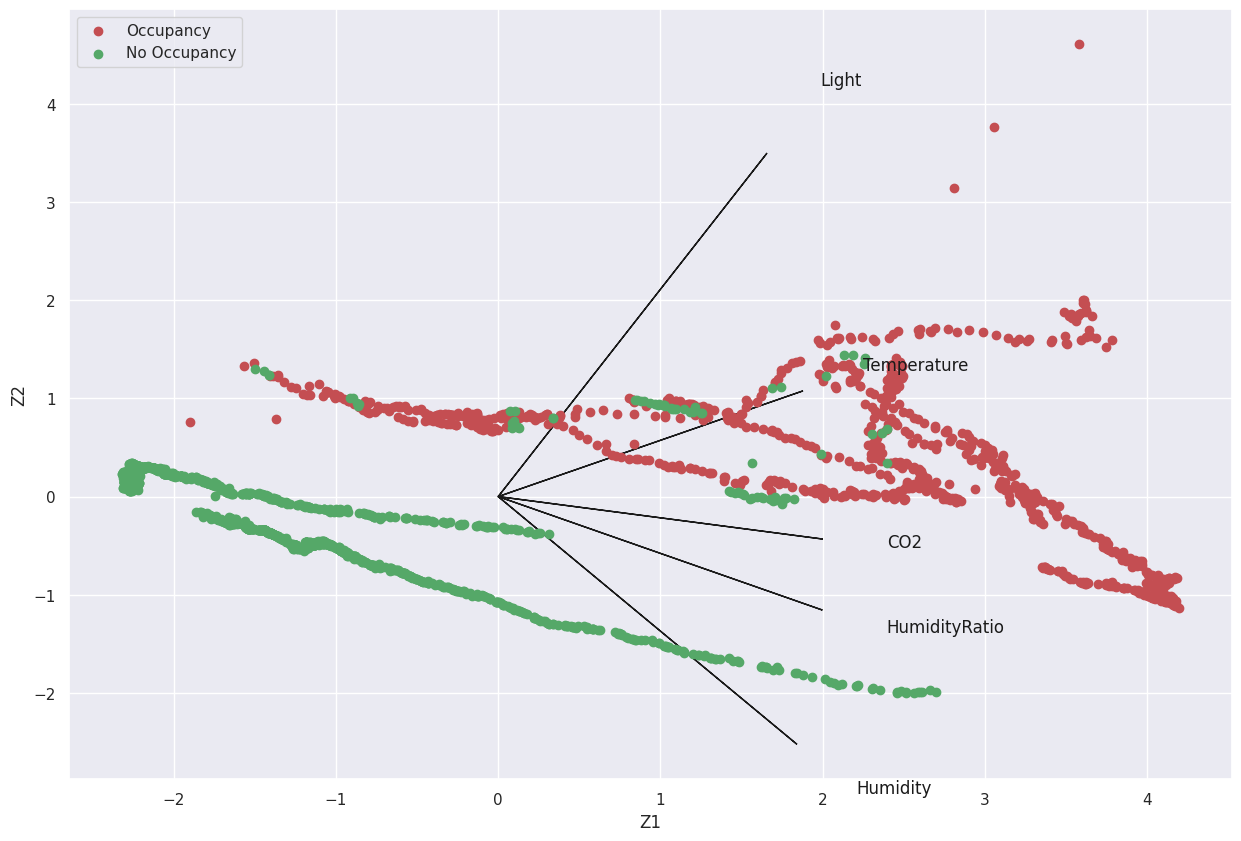

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Occupancy,0], Z[idx_Occupancy,1], c='r', label='Occupancy')
plt.scatter(Z[idx_No_Occupancy,0], Z[idx_No_Occupancy,1], c='g', label='No Occupancy')

plt.legend(loc='upper left')
Z1
Z2

## **USING PCA LIBRARY**

In [ ]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.4 MB/s eta 0:00:00


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [ ]:
out['PC']

PC1       PC2
0     2.393796  1.183934
1     2.418970  1.156295
2     2.413574  1.155220
3     2.258606  0.945017
4     2.302363  0.908998
...        ...       ...
2660  3.601424  1.966538
2661  3.608329  1.972136
2662  3.602353  2.005934
2663  3.609167  1.997557
2664  3.615387  1.962831

[2665 rows x 2 columns]

**Scatter Plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [99.23%] of the variance'}, xlabel='PC1 (85.1% expl.var)', ylabel='PC2 (10.1% expl.var)'>)

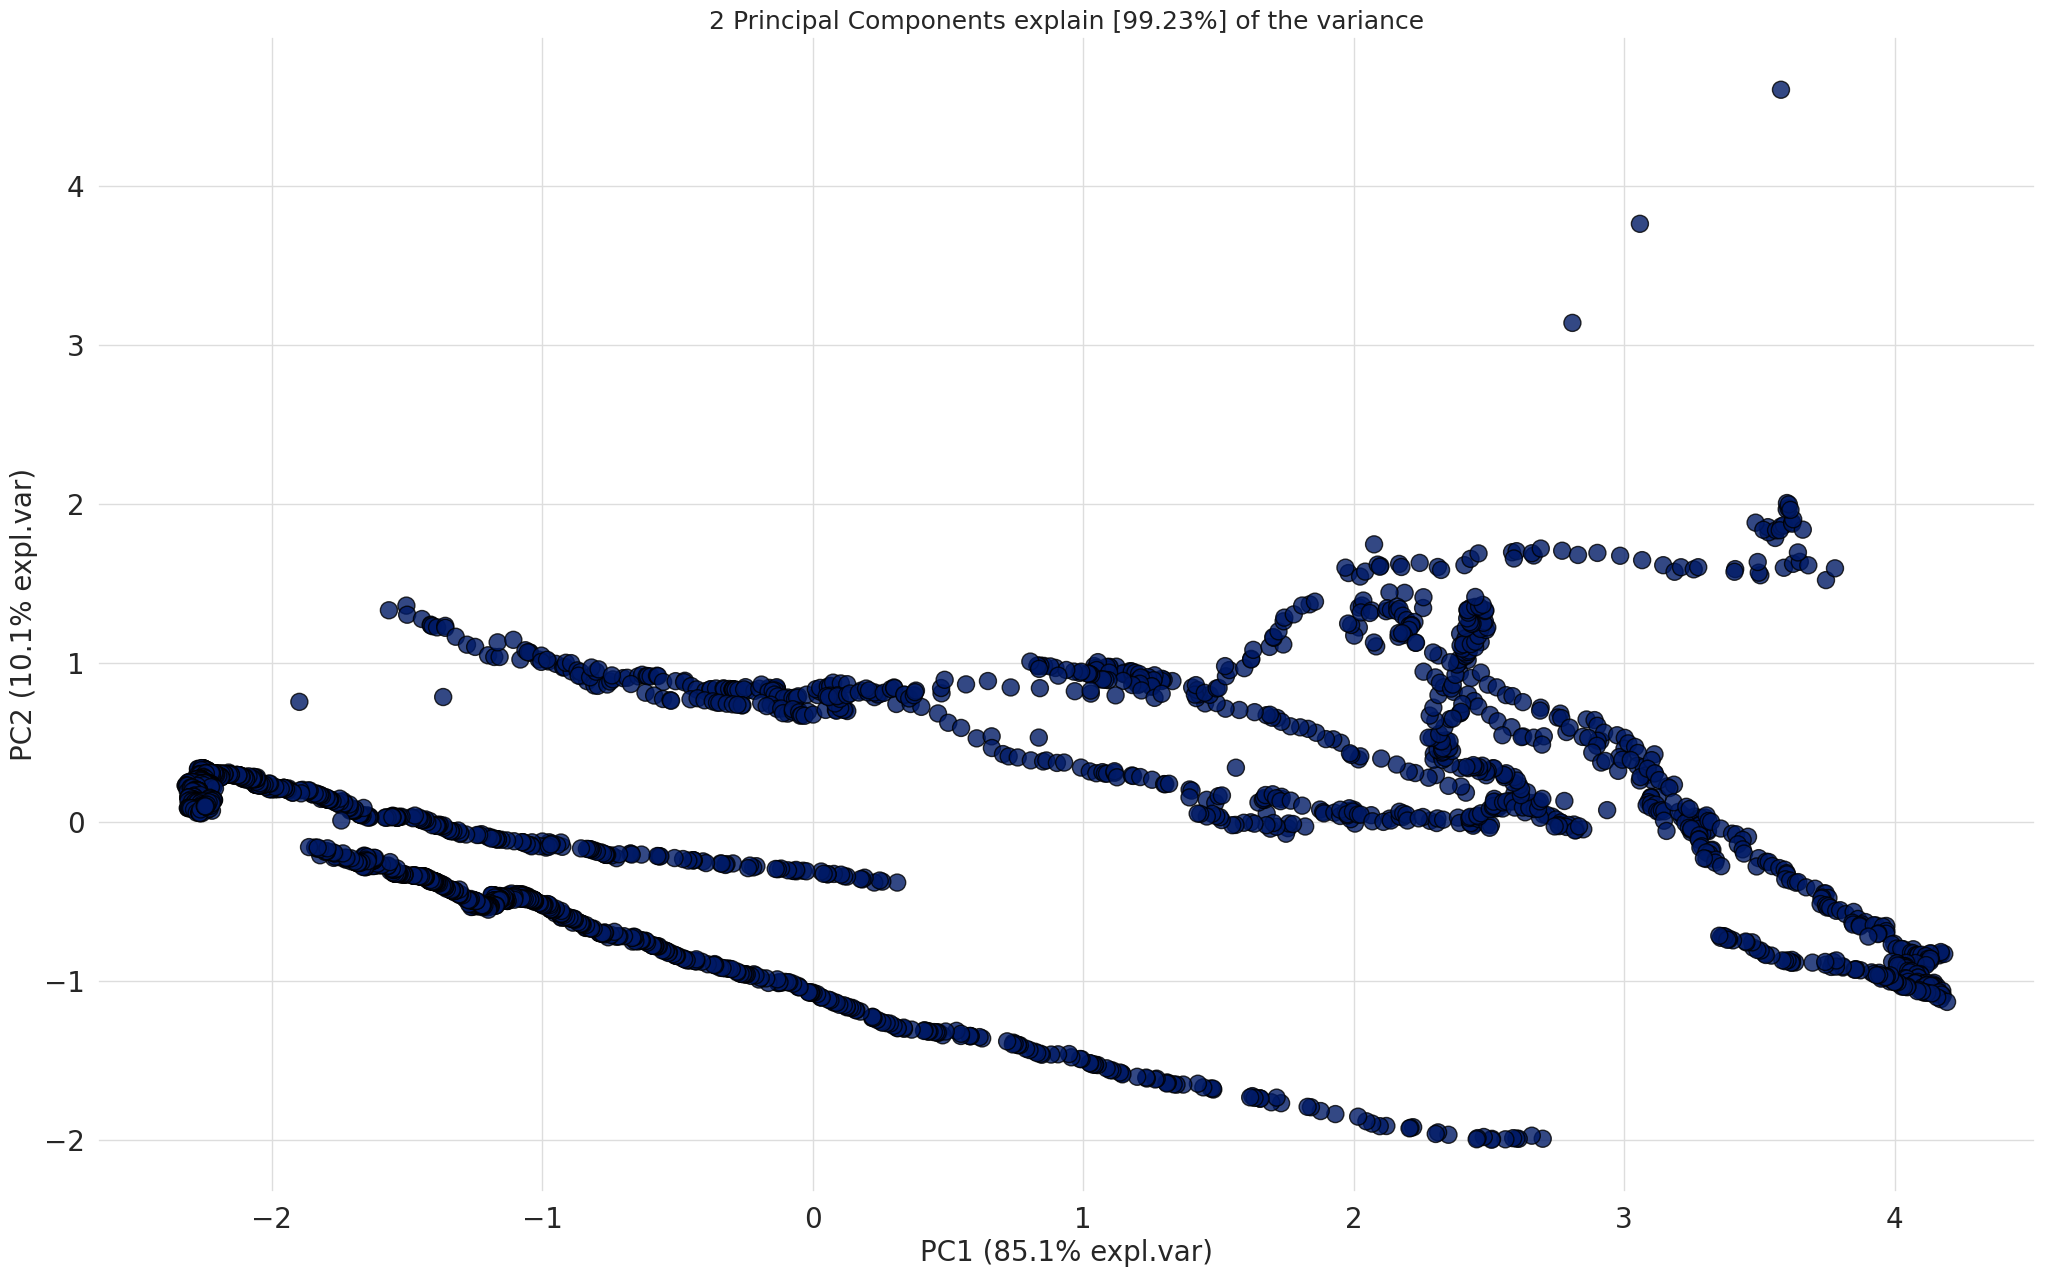

In [ ]:
model.scatter(label=True, legend=False)

**EigenVectors**

In [ ]:
A = out['loadings'].T

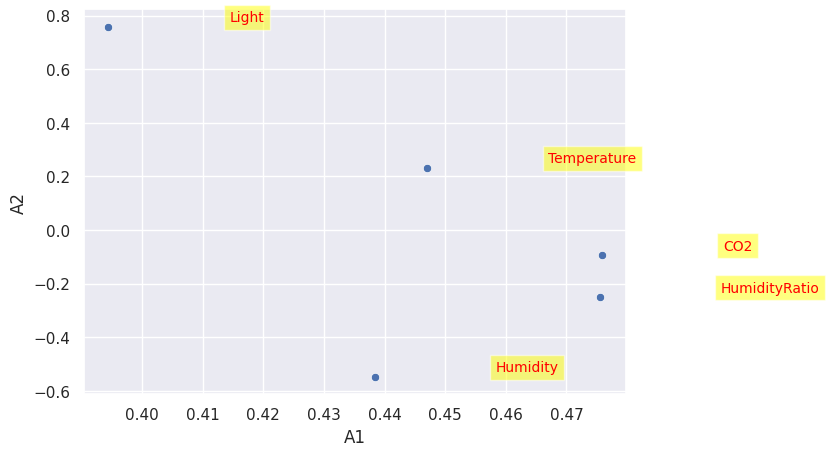

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Screen Plot**

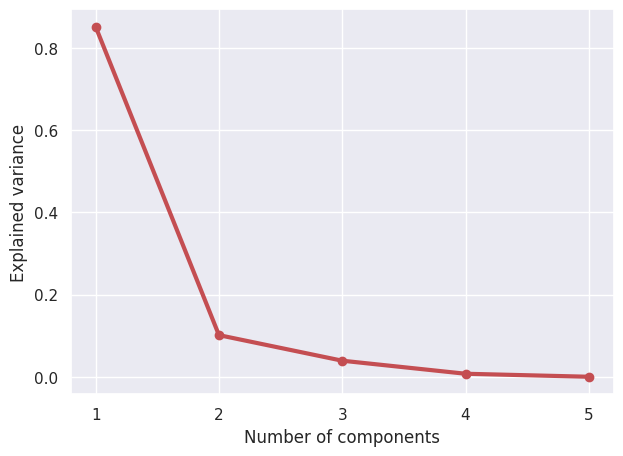

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

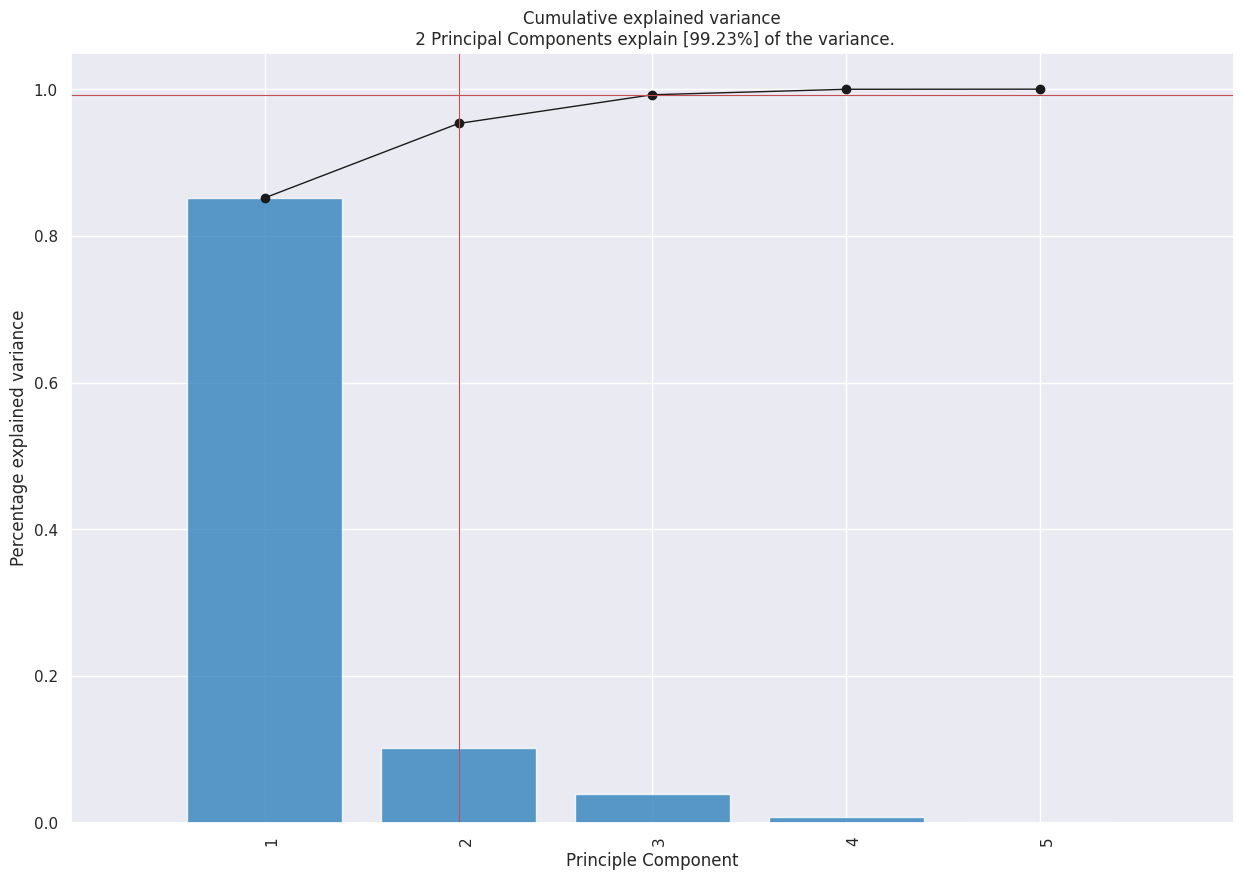

In [ ]:
model.plot();

**Biplot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [99.23%] of the variance'}, xlabel='PC1 (85.1% expl.var)', ylabel='PC2 (10.1% expl.var)'>)

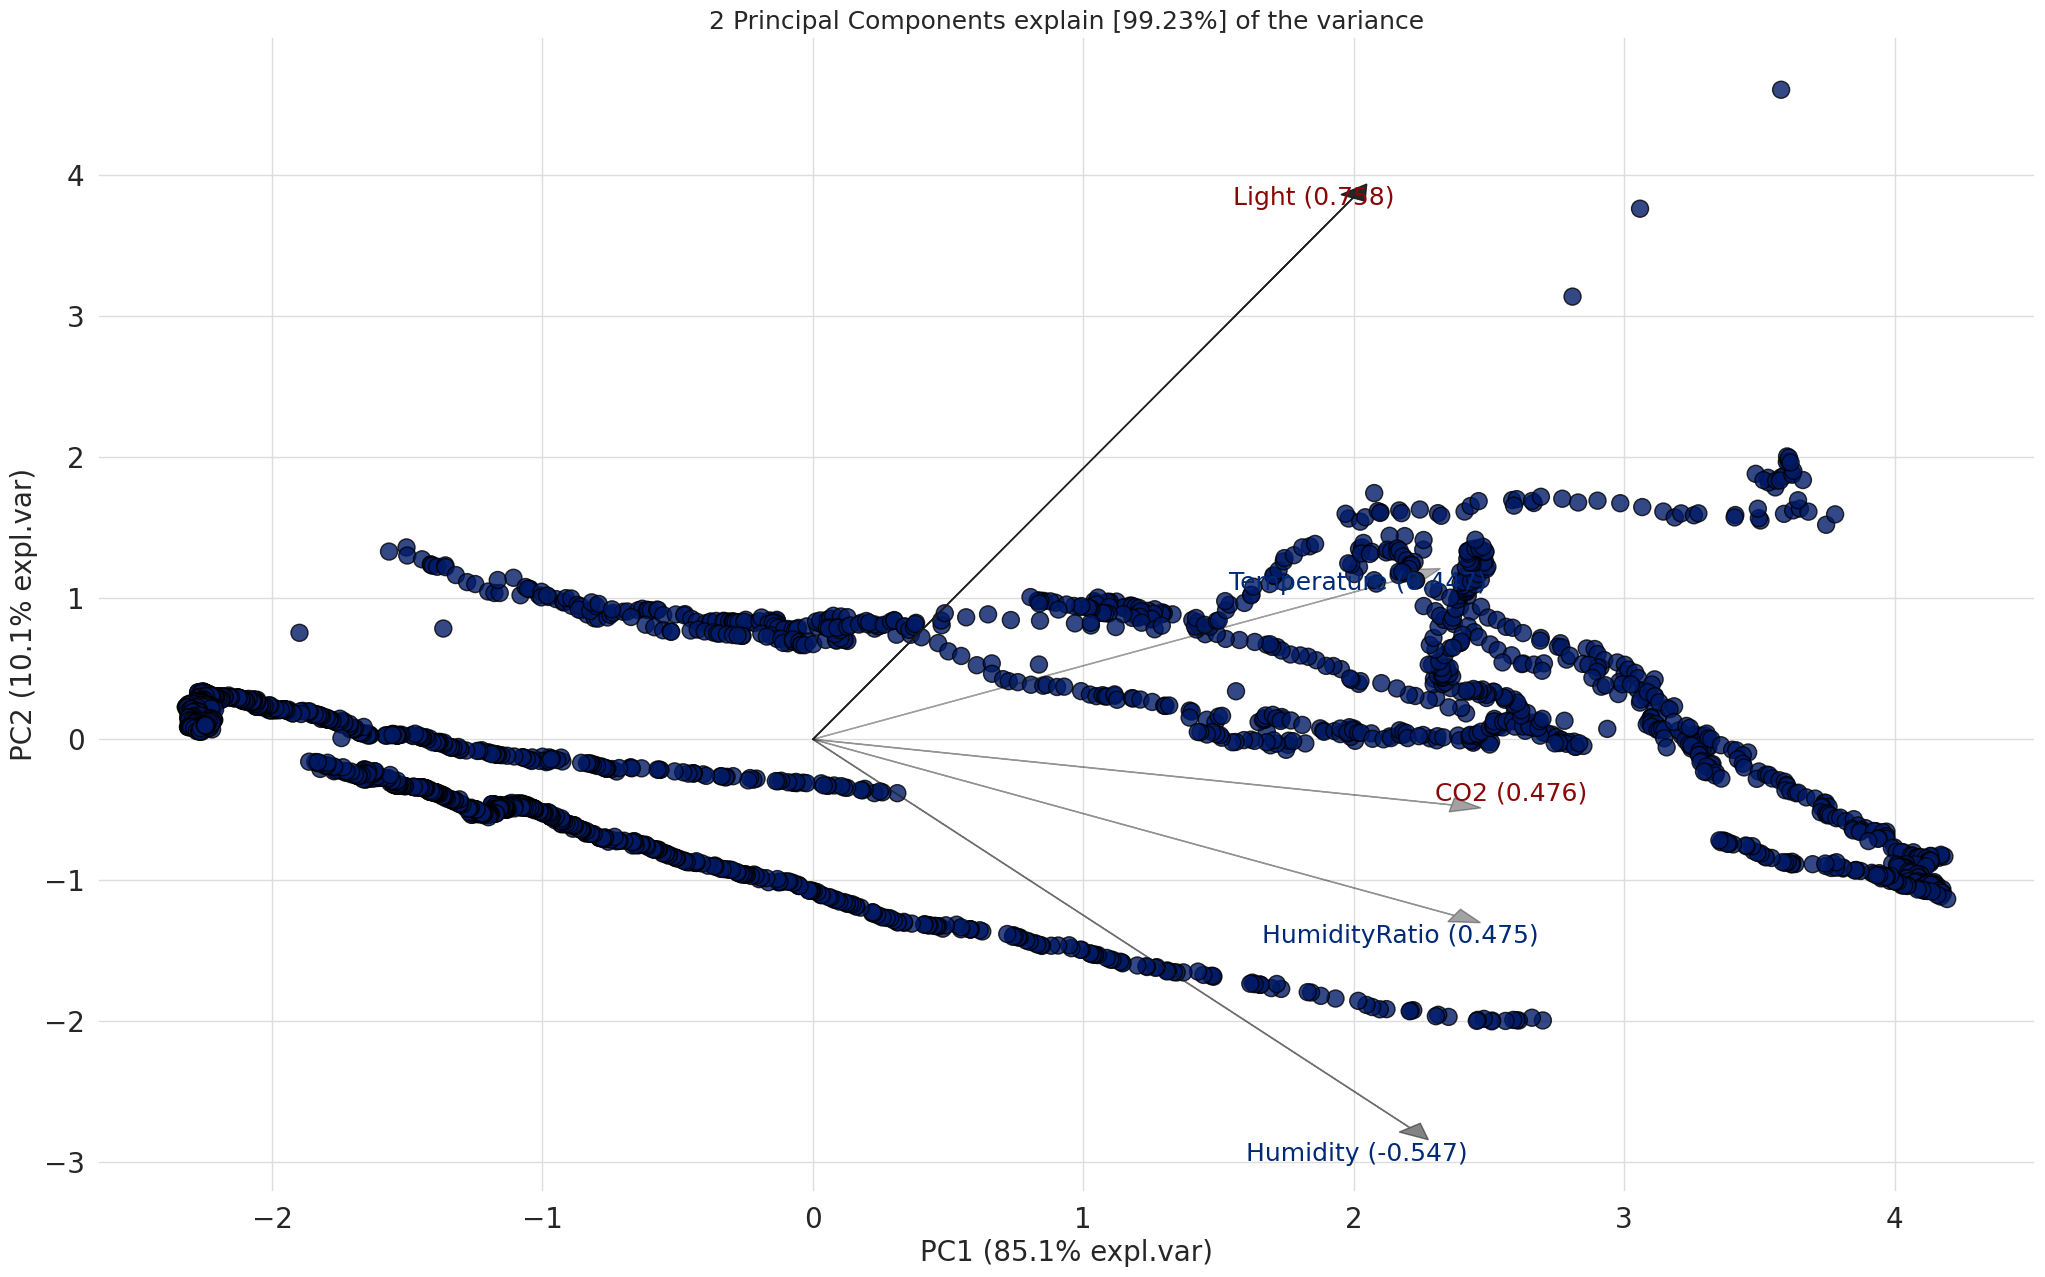

In [ ]:
model.biplot(label=False, legend=False, color_arrow='k')


# **CLASSIFICATION USING PYCARET**

At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found. Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [ ]:
from pycaret.utils import version
version()

'3.3.2'

In [ ]:
df.info()
from pycaret.classification import setup, compare_models

# Setup the environment in PyCaret
clf1 = setup(data=df, target='Occupancy', session_id=123)


<class 'pandas.core.frame.DataFrame'>
Index: 2665 entries, 140 to 2804
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    2665 non-null   float64
 1   Humidity       2665 non-null   float64
 2   Light          2665 non-null   float64
 3   CO2            2665 non-null   float64
 4   HumidityRatio  2665 non-null   float64
 5   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 145.7 KB


In [ ]:
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

## **Data Splitting**

In order to demonstrate the predict_model() function on unseen data, a sample of 267 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 267 records were not available at the time when the machine learning experiment was performed.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (2398, 6)
Unseen Data For Predictions: (267, 6)


## **Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline.

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
from pycaret.classification import *
clf_pca = setup(data=df, target='Occupancy', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 2)


### **Comparing All Models**

In [ ]:
#show the best model and their statistics
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.**

## **Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

Decision Tree Classifier ('dt') K Neighbors Classifier ('knn') Logistic Regression ('lr') There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

## **Create Decision Tree Classifier**

In [54]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [55]:
dt = create_model('dt')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [56]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

### **Tune a Model**

How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

### **Tune Decision Tree Model**

In [57]:
tuned_dt = tune_model(dt)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [58]:
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_samples_leaf=5,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

### **Evaluate Decision Tree Model**

In [59]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### **Create 'K' Neighbours Model**

In [60]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### **Tune 'K' Neighbours Models**

In [61]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### **Evaluate K Neighbours Model**

In [62]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### **Create Logistic Regression Model**

In [63]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [64]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### **Tune Logistic Regression Model**

In [65]:
tuned_lr = tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [66]:
tuned_lr

LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### **Evaluate Logistic Regression Model**

In [67]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### **Create Random Forest Model**

In [68]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### **Tune Random Forest Model**

In [69]:
tuned_rf = tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### **Evaluate Random Forest Model**

In [70]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### **Create Support Vector**

In [71]:
svm = create_model('svm')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### **Tune Support Vector Model**

In [72]:
tuned_svm = tune_model(svm)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### **Evaluate Support Vector Model**

In [73]:
evaluate_model(tuned_svm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## **Tune the Best Model**

In [74]:
tuned_best_model = tune_model(best_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [75]:
tuned_best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

## **Evaluate The Best Model**

In [76]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Classification + PCA**

In [77]:
clf_pca = setup(data=df, target='Occupancy', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

In [78]:
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [79]:
best_model_pca

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

### **Tune the Best Model**

In [80]:
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [81]:
tuned_best_model_pca

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

## **Evaluate The Best Model**

In [82]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…